In [1]:
ls


 Volume in drive C is Windows
 Volume Serial Number is FE60-F935

 Directory of C:\Users\ben10\AnacondaProjects

30/03/2017  04:28 PM    <DIR>          .
30/03/2017  04:28 PM    <DIR>          ..
30/03/2017  04:28 PM    <DIR>          .ipynb_checkpoints
30/03/2017  04:28 PM                72 Untitled.ipynb
               1 File(s)             72 bytes
               3 Dir(s)  445,817,597,952 bytes free


In [1]:
import pyfolio as pf


In [2]:
stock_rets = pf.utils.get_symbol_rets('FB')


Entire data start date: 2012-05-21
Entire data end date: 2017-04-11


Out-of-Sample Months: 16
Backtest Months: 42


Performance statistics,All history,Backtest,Out of sample
annual_return,0.30,0.33,0.22
cum_returns_final,2.66,1.73,0.31
annual_volatility,0.39,0.43,0.26
sharpe_ratio,0.87,0.87,0.89
calmar_ratio,0.64,0.69,1.59
stability_of_timeseries,0.91,0.89,0.77
max_drawdown,-0.48,-0.48,-0.14
omega_ratio,1.18,1.18,1.20
sortino_ratio,1.40,1.39,1.46
skew,1.88,1.73,2.35


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,47.90,2012-05-21,2012-09-04,2013-07-25,309
1,22.06,2014-03-10,2014-04-28,2014-07-24,99
2,17.34,2013-10-18,2013-11-25,2013-12-17,43
3,16.57,2015-07-21,2015-08-24,2015-10-19,65
4,13.68,2016-10-24,2016-12-30,2017-02-08,78




[-0.048 -0.102]


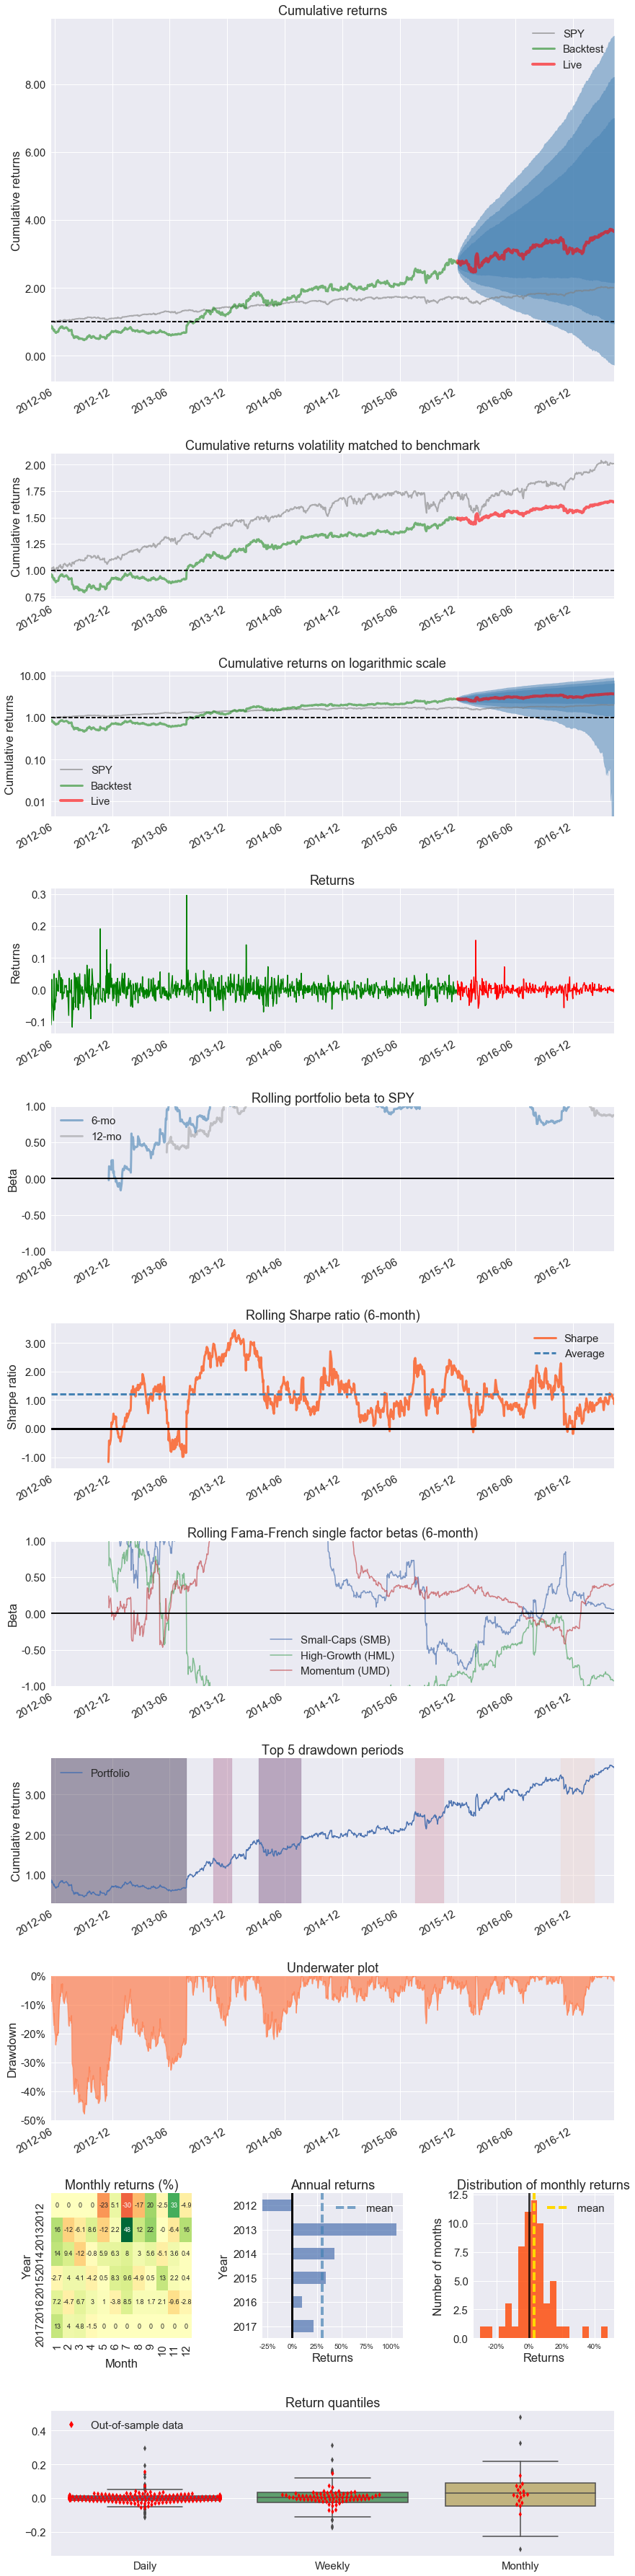

In [3]:
pf.create_returns_tear_sheet(stock_rets, live_start_date='2015-12-1')

In [ ]:
import pyfolio
import numpy as np
import pandas as pd

if __name__ == '__main__':
    #N_DAYS = 98
    #dates = pd.date_range('20130107', periods=N_DAYS)
    #df = pd.DataFrame(0.001*np.random.randn(N_DAYS,1), index=dates, columns=list('A'))
    
    df.index = df.index.tz_localize('UTC')
    #df.index.sort()
    print(df.dtypes)
    #print(df['A'])
    my_bmark = pyfolio.utils.get_symbol_rets('ASX')
    #df.index = df.index.normalize() 

    

    #pyfolio.create_returns_tear_sheet(returns = df['A'])
    backtest_data = pd.read_csv('result_threshold_0.5.csv')
    
    backtest_data = backtest_data.set_index("Date")
    backtest_data.index = pd.to_datetime(backtest_data.index, infer_datetime_format = True)
    backtest_data.index = backtest_data.index.tz_localize('UTC')
    #print(backtest_data)
    returns_data = pd.DataFrame(backtest_data['base_return']/backtest_data['base_return'].shift() - 1)
    returns_data.index = backtest_data.index
    returns_data = returns_data.dropna()
    print(returns_data)
    pyfolio.create_returns_tear_sheet(returns = returns_data['base_return'], benchmark_rets = my_bmark)
    oos_date = '2015-04-01'
    pyfolio.create_bayesian_tear_sheet(returns = returns_data['base_return'], live_start_date = oos_date)

In [6]:
ls

 Volume in drive C is Windows
 Volume Serial Number is FE60-F935

 Directory of C:\Users\ben10\AnacondaProjects

12/04/2017  04:59 PM    <DIR>          .
12/04/2017  04:59 PM    <DIR>          ..
30/03/2017  03:28 PM    <DIR>          .ipynb_checkpoints
12/04/2017  04:58 PM            23,915 result_threshold_0.5.csv
12/04/2017  04:59 PM           732,340 Untitled.ipynb
               2 File(s)        756,255 bytes
               3 Dir(s)  428,788,252,672 bytes free


A    float64
dtype: object
                           base_return
Date                                  
2015-03-30 00:00:00+00:00     0.000139
2015-03-31 00:00:00+00:00    -0.000727
2015-04-01 00:00:00+00:00     0.003009
2015-04-07 00:00:00+00:00     0.002479
2015-04-08 00:00:00+00:00     0.003171
2015-04-09 00:00:00+00:00     0.000612
2015-04-10 00:00:00+00:00    -0.003549
2015-04-13 00:00:00+00:00     0.000377
2015-04-14 00:00:00+00:00     0.007552
2015-04-15 00:00:00+00:00     0.000668
2015-04-16 00:00:00+00:00     0.009995
2015-04-17 00:00:00+00:00    -0.001804
2015-04-20 00:00:00+00:00    -0.001442
2015-04-21 00:00:00+00:00     0.004440
2015-04-22 00:00:00+00:00    -0.000126
2015-04-23 00:00:00+00:00    -0.006976
2015-04-24 00:00:00+00:00    -0.004398
2015-04-27 00:00:00+00:00    -0.005700
2015-04-28 00:00:00+00:00     0.011421
2015-04-29 00:00:00+00:00     0.000005
2015-04-30 00:00:00+00:00     0.003713
2015-05-04 00:00:00+00:00    -0.006961
2015-05-05 00:00:00+00:00     0.00799

Performance statistics,Backtest
annual_return,0.17
cum_returns_final,0.33
annual_volatility,0.08
sharpe_ratio,1.90
calmar_ratio,3.27
stability_of_timeseries,0.89
max_drawdown,-0.05
omega_ratio,1.42
sortino_ratio,3.24
skew,1.45


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,5.15,2015-07-10,2015-08-07,2015-08-24,32
1,4.88,2016-06-14,2016-07-28,2016-11-08,106
2,2.51,2016-01-19,2016-02-11,2016-02-19,24
3,2.13,2015-05-11,2015-05-27,2015-06-02,17
4,2.06,2015-06-18,2015-06-26,2015-07-07,14




[-0.01  -0.021]


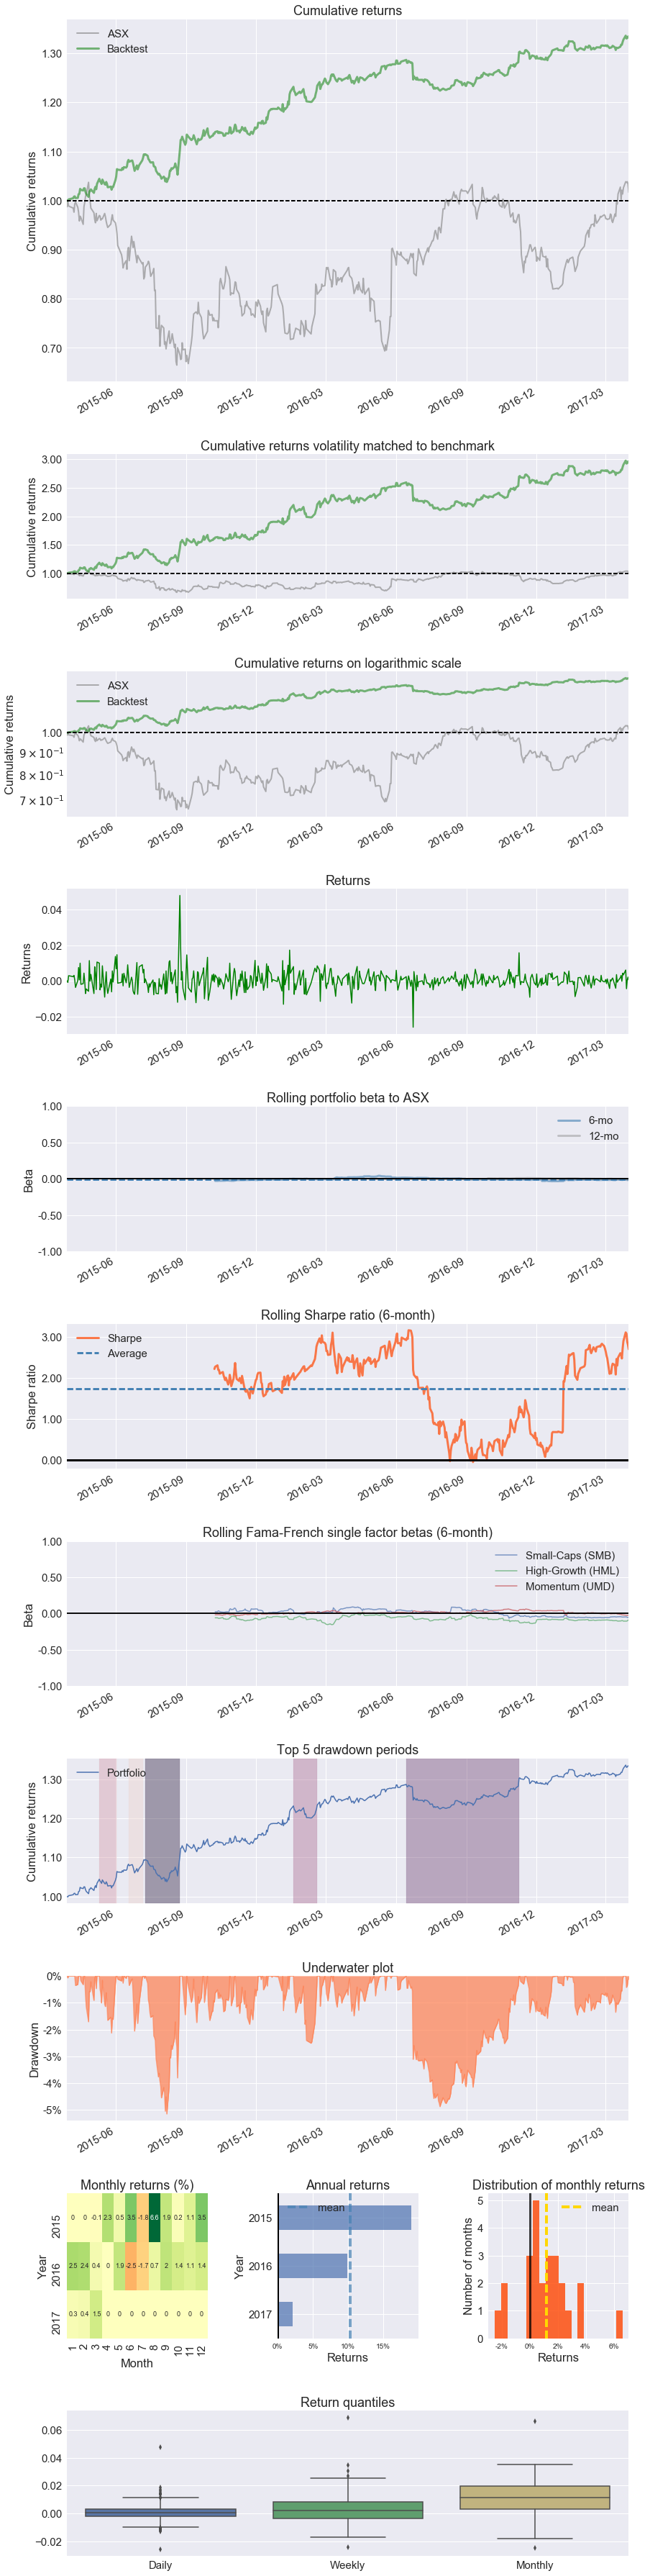

Running T model
Optimization terminated successfully.
         Current function value: -1535.675972
         Iterations: 3
         Function evaluations: 122


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.54it/s]



Finished T model (required 33.15 seconds).

Running BEST model


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:12<00:00, 165.08it/s]



Finished BEST model (required 38.70 seconds).

Finished plotting Bayesian cone (required 0.13 seconds).


C:\Users\ben10\Anaconda3\envs\Quant\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "



Finished plotting BEST results (required 0.64 seconds).

Finished computing Bayesian predictions (required 0.12 seconds).

Finished plotting Bayesian VaRs estimate (required 0.05 seconds).

Running alpha beta model
Optimization terminated successfully.
         Current function value: -1532.471536
         Iterations: 3
         Function evaluations: 153


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:08<00:00, 231.41it/s]



Finished running alpha beta model (required 25.44 seconds).

Finished plotting alpha beta model (required 0.21 seconds).

Total runtime was 98.43 seconds.


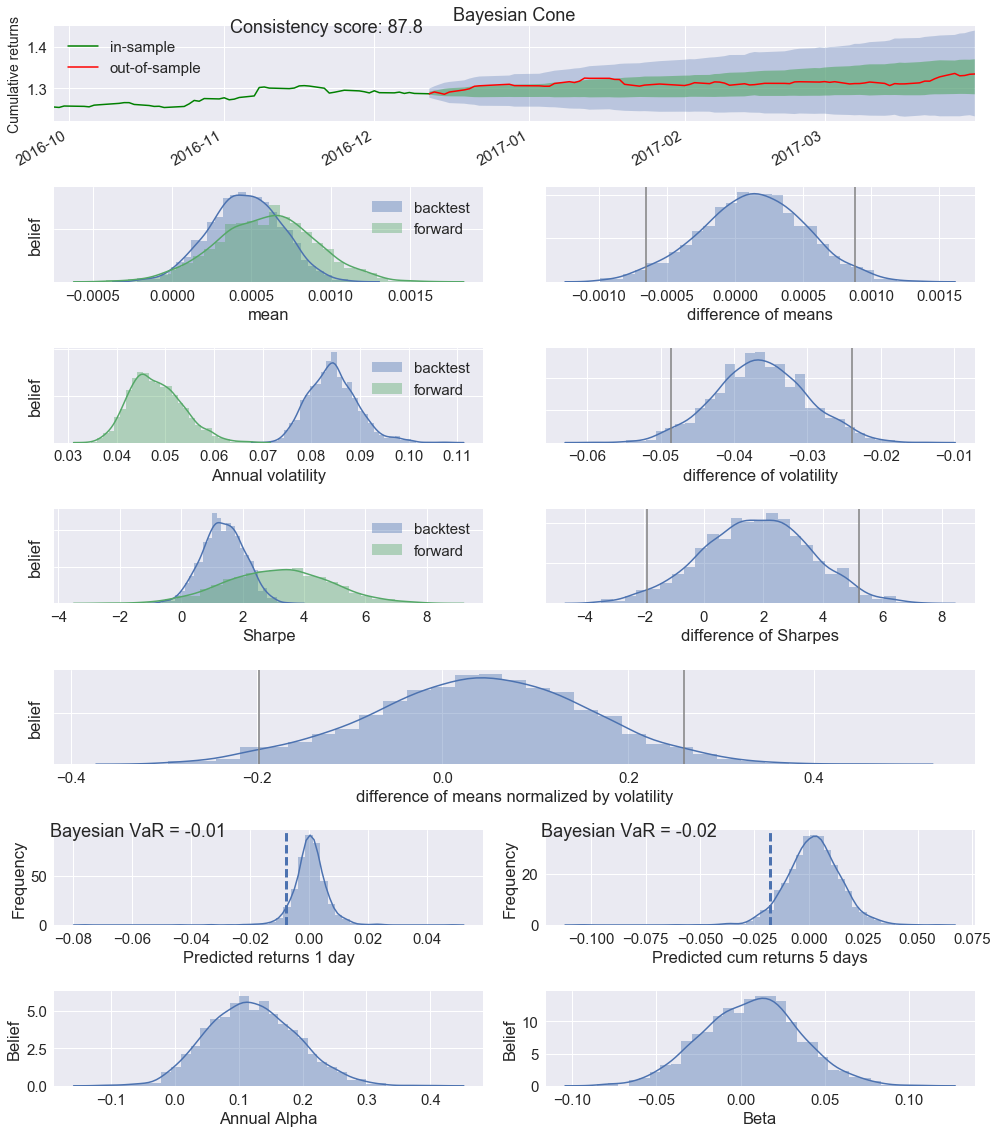

In [13]:
import pyfolio
import numpy as np
import pandas as pd

if __name__ == '__main__':
    #N_DAYS = 98
    #dates = pd.date_range('20130107', periods=N_DAYS)
    #df = pd.DataFrame(0.001*np.random.randn(N_DAYS,1), index=dates, columns=list('A'))
    
    #df.index = df.index.tz_localize('UTC')
    #df.index.sort()
    print(df.dtypes)
    #print(df['A'])
    my_bmark = pyfolio.utils.get_symbol_rets('ASX')
    #df.index = df.index.normalize() 

    

    #pyfolio.create_returns_tear_sheet(returns = df['A'])
    backtest_data = pd.read_csv('result_threshold_0.5.csv')
    
    backtest_data = backtest_data.set_index("Date")
    backtest_data.index = pd.to_datetime(backtest_data.index, infer_datetime_format = True)
    backtest_data.index = backtest_data.index.tz_localize('UTC')
    #print(backtest_data)
    returns_data = pd.DataFrame(backtest_data['base_return']/backtest_data['base_return'].shift() - 1)
    returns_data.index = backtest_data.index
    returns_data = returns_data.dropna()
    print(returns_data)
    pyfolio.create_returns_tear_sheet(returns = returns_data['base_return'], benchmark_rets = my_bmark)
    oos_date = '2016-12-12'
    pyfolio.create_bayesian_tear_sheet(returns = returns_data['base_return'], live_start_date = oos_date)